In [1]:
import pandas as pd
import pickle, torch, config
from models.model import CNNtoRNN

from nltk.translate.bleu_score import sentence_bleu

/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# n-gram individual BLEU

candidate = ['this', 'are', 'a', 'test']
reference = [['this', 'is', 'a', 'test']]
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

Individual 1-gram: 0.750000
Individual 2-gram: 0.333333
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000


/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [7]:
with open("vocab.pkl", "rb") as f:
    vocab = pickle.load(f)
    

In [8]:
idx_str_map = {v:k for k, v in vocab.items()}

In [9]:
checkpoint = torch.load(config.MODEL_PATH)
model = CNNtoRNN(config.EMBED_SIZE, config.HIDDEN_SIZE, len(idx_str_map), 2)

model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [10]:
train_loss = checkpoint['train_loss']
val_loss = checkpoint['val_loss']


In [12]:
import matplotlib.pyplot as plt

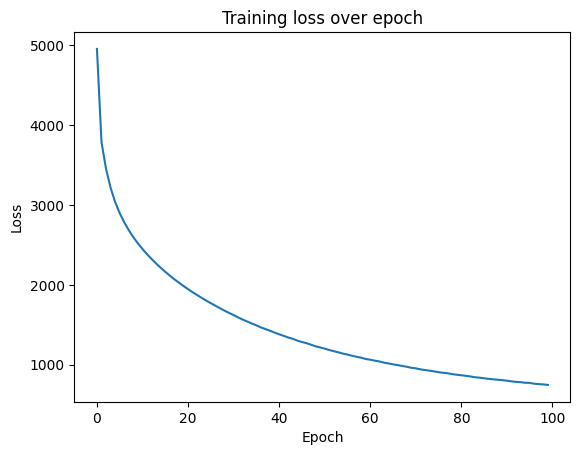

In [15]:
plt.plot(train_loss)
plt.title("Training loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('train_loss.jpg')

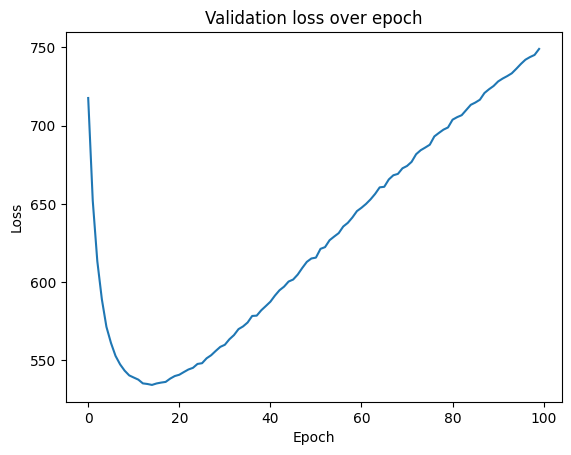

In [16]:
plt.plot(val_loss)
plt.title("Validation loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("val_loss.jpg")

In [41]:
for idx, name in enumerate(glob.glob('inference_images/*')):
    print(idx)
    print(name.split('/')[1])
    break

0
2.jpg


In [1]:
check = ['<start>', 'a', 'man', 'in', 'a', 'black', 'shirt', 'and', 'jeans', 'is', 'rock', 'climbing', '.', '<end>']

In [8]:
" ".join(check[1:-1]).capitalize()

'A man in a black shirt and jeans is rock climbing .'

In [11]:
states = (torch.zeros(1, 1, 100),torch.zeros(1, 1, 100))

In [15]:
states[0].shape

torch.Size([1, 1, 100])

In [2]:
with open("vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [3]:
idx_str_map = {v:k for k, v in vocab.items()}

In [4]:
idx_str_map

{0: '<PAD>',
 1: '<start>',
 2: '<end>',
 3: '<UNK>',
 4: 'walkers',
 5: 'on',
 6: 'a',
 7: 'concrete',
 8: 'boardwalk',
 9: 'under',
 10: 'blue',
 11: 'sky',
 12: '.',
 13: 'man',
 14: 'in',
 15: 'colorful',
 16: 'jacket',
 17: 'walks',
 18: 'down',
 19: 'the',
 20: 'street',
 21: 'surrounded',
 22: 'by',
 23: 'women',
 24: 'winter',
 25: 'clothing',
 26: 'young',
 27: 'boy',
 28: 'is',
 29: 'skating',
 30: 'through',
 31: 'park',
 32: 'girl',
 33: 'wearing',
 34: 'and',
 35: 'scarf',
 36: 'playing',
 37: 'beach',
 38: 'black',
 39: 'dog',
 40: 'carrying',
 41: 'hanging',
 42: 'flower',
 43: 'pot',
 44: 'two',
 45: 'men',
 46: 'are',
 47: 'wrestling',
 48: 'while',
 49: 'other',
 50: 'people',
 51: 'watching',
 52: 'following',
 53: 'tan',
 54: 'fetching',
 55: 'large',
 56: 'shallow',
 57: 'bowl',
 58: 'dancing',
 59: 'front',
 60: 'of',
 61: 'crowd',
 62: 'darkly',
 63: 'lit',
 64: 'scene',
 65: 'woman',
 66: 'kissing',
 67: 'hitting',
 68: 'skateboard',
 69: 'with',
 70: 'plushie',

In [5]:
with open("idx_str_map.pkl", "wb") as f:
    pickle.dump(idx_str_map, f)

In [5]:
from models.model import CNNtoRNN

/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
embed_size = 256
hidden_size = 256
vocab_size = len(vocab)
num_layers = 1
learning_rate = 3e-4
num_epochs = 100
batch_size = 8
max_length = 40


In [7]:

# initialize model, loss etc 
model = CNNtoRNN(embed_size, hidden_size, vocab_size, num_layers)

In [8]:
from torchvision import transforms

from PIL import Image

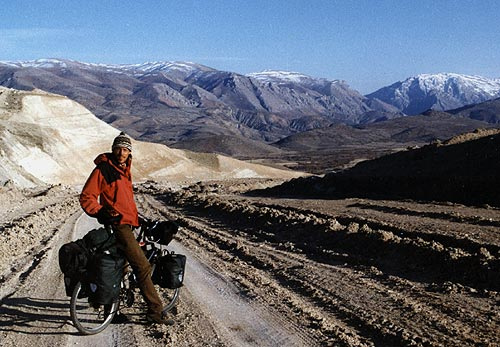

In [9]:
img = Image.open("test_images/elephant.jpg")

img

In [10]:
transform = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    )

In [11]:
image_tensor = transform(img)

In [12]:
image_tensor.shape

torch.Size([3, 224, 224])

In [13]:
import torch

In [14]:
# def caption_image(image, max_length=40):
#     """
#     1. Pass the image through the encoder CNN to get the encoded image.
#     2. Pass the encoded image through the decoder RNN to get the predicted word.
#     3. Pass the predicted word through the decoder RNN to get the next predicted word.
#     4. Repeat until the predicted word is the end token.
    
#     :param image: the image we want to caption
#     :param vocabulary: the vocabulary object that contains the word to index mapping
#     :param max_length: The maximum length of the caption, defaults to 50 (optional)
#     :return: A list of words
#     """
#     result_caption = []
#     with open("idx_str_map.pkl", "rb") as f:
#         idx_str_map = pickle.load(f)
#     with torch.no_grad():
#         self.encoderCNN.eval()
#         x = self.encoderCNN(image)
#         print(x.shape)
#         x = self.encoderCNN(image).unsqueeze(0)
#         print(x.shape)
#         states = None

#         for _ in range(max_length):
#             self.decoderRNN.eval()
#             hiddens, states = self.decoderRNN.lstm(x, states)
#             output = self.decoderRNN.linear(hiddens.squeeze(0))
#             predicted = output.argmax(1)
#             result_caption.append(predicted.item())
#             x = self.decoderRNN.embed(predicted).unsqueeze(0)

#             if idx_str_map[predicted.item()] == "<end>":
#                 break
    
#     return [idx_str_map[idx] for idx in result_caption]

In [15]:
check_caption = model.caption_image2(image_tensor.unsqueeze(0))

In [16]:
len(check_caption)

20

In [17]:
check_caption

['just',
 'uses',
 'pep',
 'slab',
 'shaky',
 'cringes',
 'bottom',
 'puffy',
 'shoreline',
 'construction',
 'brightly',
 'jewels',
 'priests',
 'hot',
 'outfut',
 'sponges',
 'headfirst',
 'mouse',
 'flows',
 'ducky']

In [11]:
df = pd.read_csv("data/captions.csv")

In [12]:
df['len'] = df['caption'].apply(lambda x: len(x.split()))

In [13]:
df['len'].max()

38

In [14]:
df['len'].quantile(.98)

21.0

In [46]:
df['len'].mean()

11.78259794833766

In [57]:
df[df["len"]==21]

,image,caption,len
12,1002674143_1b742ab4b8.jpg,A small girl in the grass plays with fingerpai...,21
206,1056249424_ef2a2e041c.jpg,"Two boys , one with a yellow and orange ball ,...",21
330,1084104085_3b06223afe.jpg,a woman in a yellow shirt and green shorts is ...,21
349,1088767354_2acee738cf.jpg,Two young people are approached by a flamboyan...,21
614,1131155939_b4b457b05e.jpg,"A pile of seaweed sits on the sand , behind it...",21
...,...,...,...
40172,945509052_740bb19bc3.jpg,A woman in a black bathing suit is sitting und...,21
40176,946051430_8db7e4ce09.jpg,A group of five women and girls in bathing sui...,21
40186,947969010_f1ea572e89.jpg,A black dog with a red collar has an item in h...,21
40281,961611340_251081fcb8.jpg,A little girl in a pink tutu gets ready for ba...,21


In [54]:
check = df[(df['len']>=5) & (df['len']<=25)][['image', 'caption']].sample(frac=1).reset_index(drop=True)


In [16]:
check = df[(df['len']>=20) & (df['len']<9)][['image', 'caption']].sample(frac=1).reset_index(drop=True)


In [48]:
from torchvision import transforms

In [49]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

In [50]:
from inference import caption_img

Evaluation

,image,caption,len
38725,561179890_af8e31cb2e.jpg,A bearded man with a backpack on his back hold...,21
3659,1808007704_ee8a93abb4.jpg,A man jumps from one boulder to another and tw...,21
25855,3344233740_c010378da7.jpg,A man is standing on a sidewalk in the backgro...,21
36504,441817653_fbdf83060b.jpg,"An old man with a long white beard , glasses ,...",21
22767,3217620013_8b17873273.jpg,A man in a red uniform is playing backset ball...,21
28922,3465396606_5ba1574128.jpg,A man in shorts walks a big brown dog and a wo...,21
17986,2987096101_a41896187a.jpg,A woman in a pink shirt and khaki shorts looks...,21
20327,3109124656_626b596d5e.jpg,A man and woman have their arms around each ot...,21
3427,173020287_230bfc4ffc.jpg,"A man stands with his arm up in the air , hold...",21
34811,3708244207_0d3a2b2f92.jpg,"A man stands on a dock near several boats , wh...",21


In [71]:
df_temp = pd.concat([df[df['len']==21].sample(frac=0.1), df[df['len']==8].sample(frac=0.01)], axis=0).reset_index(drop=True)

In [77]:
df_temp

,image,caption,len
0,3334537556_a2cf4e9b9a.jpg,A man dressed in a horned hat poses for a pict...,21
1,404890608_33f138aefa.jpg,"Two boys , surrounded by paper pieces , hold a...",21
2,543326592_70bd4d8602.jpg,A group of people is gathered in front of foun...,21
3,3484820303_7be0e914b4.jpg,"There is a boy on a bicycle ; and a girl , hol...",21
4,3207676216_48478bce97.jpg,four husky dogs are pulling a sled in a race t...,21
...,...,...,...
62,3261493263_381a4c5cc7.jpg,A dog sled races through the snow .,8
63,3054989420_3e755ca352.jpg,A child walks outside as leaves fall .,8
64,1107471216_4336c9b328.jpg,There is a kid with a gun .,8
65,3621177753_1718c30ea0.jpg,These skateboarders are attempting stunts at n...,8


In [82]:
from PIL import Image

In [89]:
def predict(x):
    img = Image.open(f"{config.IMAGE_PATH}/{x}")
    image_tensor = transform(img)
    caption = caption_img(image_tensor.unsqueeze(0))
    processed_caption = " ".join(caption[1:-1]).capitalize()

    return processed_caption

In [90]:
df_temp['predicted_caption'] = df_temp['image'].apply(predict)

In [93]:
"check is the nation".split(" ")

['check', 'is', 'the', 'nation']

In [95]:
df_temp.head()

,image,caption,len,predicted_caption
0,3334537556_a2cf4e9b9a.jpg,A man dressed in a horned hat poses for a pict...,21,A group of people on skis with two dogs .
1,404890608_33f138aefa.jpg,"Two boys , surrounded by paper pieces , hold a...",21,Three boys are struggling with one another and...
2,543326592_70bd4d8602.jpg,A group of people is gathered in front of foun...,21,A man in a suit dances with a young girl in fr...
3,3484820303_7be0e914b4.jpg,"There is a boy on a bicycle ; and a girl , hol...",21,A man and woman ride bicycles on the sidewalk .
4,3207676216_48478bce97.jpg,four husky dogs are pulling a sled in a race t...,21,A man is behind a dogsled a sled in the snow .


In [97]:
df_temp["caption"]

0     A man dressed in a horned hat poses for a pict...
1     Two boys , surrounded by paper pieces , hold a...
2     A group of people is gathered in front of foun...
3     There is a boy on a bicycle ; and a girl , hol...
4     four husky dogs are pulling a sled in a race t...
                            ...                        
62                  A dog sled races through the snow .
63               A child walks outside as leaves fall .
64                          There is a kid with a gun .
65    These skateboarders are attempting stunts at n...
66                   A pitbull dog chasing a red ball .
Name: caption, Length: 67, dtype: object

In [98]:
def bleu_score(x):
    return sentence_bleu(x['caption'].split(" "), x['predicted_caption'].split(" "), weights=(1, 0, 0, 0))

In [104]:
df_temp["1-gram BLEU score"] = df_temp.apply(lambda x: sentence_bleu(x['caption'].split(" "), x['predicted_caption'].split(" "), weights=(1, 0, 0, 0)), axis=1)
df_temp["2-gram BLEU score"] = df_temp.apply(lambda x: sentence_bleu(x['caption'].split(" "), x['predicted_caption'].split(" "), weights=(0, 1, 0, 0)), axis=1)
df_temp["3-gram BLEU score"] = df_temp.apply(lambda x: sentence_bleu(x['caption'].split(" "), x['predicted_caption'].split(" "), weights=(0, 0, 1, 0)), axis=1)
df_temp["4-gram BLEU score"] = df_temp.apply(lambda x: sentence_bleu(x['caption'].split(" "), x['predicted_caption'].split(" "), weights=(0, 0, 0, 1)), axis=1)

/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/fm-pc-lt-237/miniconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower 

In [107]:
df_temp[40:].to_csv("results.csv")

In [91]:
# n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

,image,caption,len,predicted_caption
0,3334537556_a2cf4e9b9a.jpg,A man dressed in a horned hat poses for a pict...,21,A group of people on skis with two dogs .
1,404890608_33f138aefa.jpg,"Two boys , surrounded by paper pieces , hold a...",21,Three boys are struggling with one another and...
2,543326592_70bd4d8602.jpg,A group of people is gathered in front of foun...,21,A man in a suit dances with a young girl in fr...
3,3484820303_7be0e914b4.jpg,"There is a boy on a bicycle ; and a girl , hol...",21,A man and woman ride bicycles on the sidewalk .
4,3207676216_48478bce97.jpg,four husky dogs are pulling a sled in a race t...,21,A man is behind a dogsled a sled in the snow .
...,...,...,...,...
62,3261493263_381a4c5cc7.jpg,A dog sled races through the snow .,8,A musher waves and smiles behind his dogs who ...
63,3054989420_3e755ca352.jpg,A child walks outside as leaves fall .,8,A group of children are playing in a puddle of...
64,1107471216_4336c9b328.jpg,There is a kid with a gun .,8,A young girl steadies her aim with a camera
65,3621177753_1718c30ea0.jpg,These skateboarders are attempting stunts at n...,8,A man performs a skateboard trick in a parking...


In [26]:
for i in check.iterrows():
    image = Image.open(i[1][0])
    image_tensor = transform(image)
    caption = caption_img(image_tensor.unsqueeze(0))

Two dogs standing in the woods .


In [70]:
train_split = int(check.shape[0]*0.85)
check[:train_split]

,image,caption
0,963730324_0638534227.jpg,A young boy attempts to push the Walmart shopp...
1,3582914739_bef2828a06.jpg,A woman wearing a helmet is in a rollerskating...
2,2363006088_b3e3aa5c0b.jpg,a young boy wearing white shoes chasing after ...
3,374567836_3ae12ecffb.jpg,A brown fluffy dog lays in the snow with its g...
4,2186139563_e60c1d4b8b.jpg,A small dog runs to catch a ball .
...,...,...
26423,2969380952_9f1eb7f93b.jpg,People running a race and the guy in grey is i...
26424,3067971348_69af5bb309.jpg,A girl is riding a bike and everyone is rushin...
26425,240583223_e26e17ee96.jpg,The yellow dog is running on the dirt road .
26426,1332815795_8eea44375e.jpg,A little girl is swinging in a baby swing on t...


In [73]:
check[train_split:].reset_index(drop=True)

,image,caption
0,2394003437_184a838aa9.jpg,The child in the green shirt is on a machine w...
1,3279988814_d3693dcb6c.jpg,Two girls dressed in black are sitting in a ro...
2,2292406847_f366350600.jpg,The fisherman paddles in his to a new spot .
3,3102363657_dc95fe6850.jpg,A little boy hugging a giant bee mascot .
4,3520079657_b828d96d50.jpg,A group of young people posing in the air on a...
...,...,...
4659,2528521798_fb689eba8d.jpg,A white rally car is throwing mud into the air...
4660,3430100177_5864bf1e73.jpg,A woman is sitting on the curb staring off int...
4661,3537400880_8f410d747d.jpg,A girl doing the splits in the air while jumpi...
4662,2947452329_08f2d2a467.jpg,Man in blue and white shorts playing a sport .


In [56]:
check.to_csv("processed.csv")

In [55]:
check = pd.read_csv("processed.csv").drop(columns=["Unnamed: 0"])

FileNotFoundError: [Errno 2] No such file or directory: 'processed.csv'

In [1]:
import pandas
df = pandas.read_csv("results.csv")

In [2]:
df

,Unnamed: 0,image,caption,len,predicted_caption,1-gram BLEU score,2-gram BLEU score,3-gram BLEU score,4-gram BLEU score
0,40,2198484810_50a893824a.jpg,A dog runs through an obstacle course .,8,A brown dog running a course with a blue leash...,0.214286,2.225074e-308,2.225074e-308,2.225074e-308
1,41,3693961165_9d6c333d5b.jpg,A brown dog runs along a fence .,8,A large grey dog is running through a fence .,0.300000,2.225074e-308,2.225074e-308,2.225074e-308
2,42,3239480519_22540b5016.jpg,A dog is running towards the photographer .,8,A black and white dog running with something i...,0.166667,2.225074e-308,2.225074e-308,2.225074e-308
3,43,531055369_936fd76a63.jpg,People standing on a sidewalk near shops .,8,A woman at a marathon table in a busy street .,0.181818,2.225074e-308,2.225074e-308,2.225074e-308
4,44,2994107810_af56326389.jpg,Two men from opposite teams playing basketball .,8,The basketball player is holding a basketball ...,0.214286,2.225074e-308,2.225074e-308,2.225074e-308
5,45,3126752627_dc2d6674da.jpg,A basketball player tries to block another .,8,A basketball player holds a ball as another pl...,0.250000,2.225074e-308,2.225074e-308,2.225074e-308
6,46,2554570943_122da6438f.jpg,a girl climbs up a red slide .,8,The girl in the red shirt is sliding down a bl...,0.153846,2.225074e-308,2.225074e-308,2.225074e-308
7,47,950273886_88c324e663.jpg,A man grasps onto the rock face .,8,A man is rock climbing with spotters below .,0.222222,2.225074e-308,2.225074e-308,2.225074e-308
8,48,3631136463_53ff624b82.jpg,Two dogs retreiving a large stick of wood,8,Two dogs share a toy in a field of vegetation .,0.090909,2.225074e-308,2.225074e-308,2.225074e-308
9,49,2446601467_a35841cb1d.jpg,A baby peeking out from inside her cot,8,A baby is peeking his head over blue playpen .,0.100000,2.225074e-308,2.225074e-308,2.225074e-308


In [23]:
import torch
from torch.nn.utils.rnn import pad_sequence  # pad batch
